# Exercise 6.01 For the 2 qubit entanglement generation circuit what is the equivalent gate matrix?

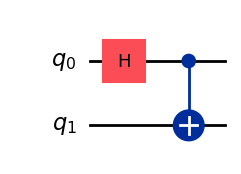

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw('mpl')


In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import numpy as np
import sympy as sp
from sympy import Matrix, latex
from IPython.display import display, Math

# 1. Build the circuit (Hadamard + CNOT)
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# 2. Get unitary matrix in correct qubit order
U = Operator(qc.reverse_bits()).data

# 3. Define symbolic threshold
sqrt2_inv = 1 / sp.sqrt(2)
tol = 1e-6

# 4. Convert to symbolic matrix
U_symbolic = []
for row in U:
    symbolic_row = []
    for elem in row:
        r = np.real(elem)
        if abs(r - 1/np.sqrt(2)) < tol:
            symbolic_row.append(sqrt2_inv)
        elif abs(r + 1/np.sqrt(2)) < tol:
            symbolic_row.append(-sqrt2_inv)
        elif abs(r - 1) < tol:
            symbolic_row.append(1)
        elif abs(r + 1) < tol:
            symbolic_row.append(-1)
        elif abs(r) < tol:
            symbolic_row.append(0)
        else:
            symbolic_row.append(sp.nsimplify(r, rational=True))
    U_symbolic.append(symbolic_row)

# 5. Display in LaTeX
U_matrix = Matrix(U_symbolic)
latex_expr = r"\frac{1}{\sqrt{2}}" + sp.latex(U_matrix / sqrt2_inv)
display(Math(latex_expr))


<IPython.core.display.Math object>

# Exercise 6.04: What is the state ψ?

Notación de Ket (Visual):
0.7071067811865475: .3f|10 + 0.7071067811865475: .3f|01

Notación de Ket (Qiskit):
0.7071067811865475: .3f|01 + 0.7071067811865475: .3f|10

Estado de ψ:
|00>: 0j
|10>: (0.7071067811865475+0j)
|01>: (0.7071067811865475+0j)
|11>: 0j


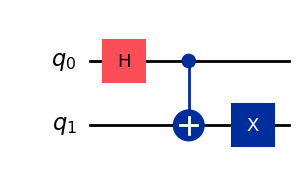

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from functions import ket_expression

qc = QuantumCircuit(2)

qc.h(0)

qc.cx(0, 1)

qc.x(1)

state = Statevector.from_instruction(qc)

print("Notación de Ket (Visual):")
print(ket_expression(state, qubit_order='visual'))
print("\nNotación de Ket (Qiskit):")
print(ket_expression(state, qubit_order='qiskit'))

print("\nEstado de \u03C8:")
for i, amp in enumerate(state.data):
    binary = format(i, f'0{qc.num_qubits}b')[::-1]
    print(f"|{binary}>: {amp}")

qc.draw("mpl")

# Exercise 6.07: What is the state ψ?

Notación de Ket (Visual):
1.0: .3f|010

Notación de Ket (Qiskit):
1.0: .3f|010

Estado de ψ:
|000>: 0j
|100>: 0j
|010>: (1+0j)
|110>: 0j
|001>: 0j
|101>: 0j
|011>: 0j
|111>: 0j


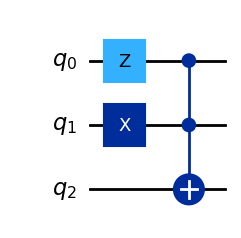

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from functions import ket_expression

qc = QuantumCircuit(3)

qc.z(0)

qc.x(1)

qc.ccx(0, 1, 2)

state = Statevector.from_instruction(qc)

print("Notación de Ket (Visual):")
print(ket_expression(state, qubit_order='visual'))
print("\nNotación de Ket (Qiskit):")
print(ket_expression(state, qubit_order='qiskit'))

print("\nEstado de \u03C8:")
for i, amp in enumerate(state.data):
    binary = format(i, f'0{qc.num_qubits}b')[::-1]
    print(f"|{binary}>: {amp}")

qc.draw("mpl")

# Exercise 6.03: What is the state ψ?

Notación de Ket (Visual):
0.7071067811865475: .3f|10 + 0.7071067811865475: .3f|01

Notación de Ket (Qiskit):
0.7071067811865475: .3f|01 + 0.7071067811865475: .3f|10

Estado de ψ:
|00>: 0j
|10>: (0.7071067811865475+0j)
|01>: (0.7071067811865475+0j)
|11>: 0j


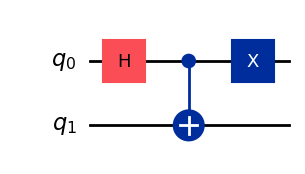

In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

def ket_expression(statevector, qubit_order='visual'):
    terms = []
    num_qubits = int(statevector.num_qubits)

    for i, amplitude in enumerate(statevector.data):
        if abs(amplitude) > 1e-10:
            bin_state = format(i, f'0{num_qubits}b')
            if qubit_order == 'visual':
                bin_state = bin_state[::-1]
            amp_str = f"{amplitude.real}: .3f" if abs(amplitude.imag) < 1e-10 else f"({amplitude: .3f})"
            terms.append(f"{amp_str}|{bin_state}")
    return " + ".join(terms)

qc = QuantumCircuit(2)

qc.h(0)

qc.cx(0, 1)

qc.x(0)

state = Statevector.from_instruction(qc)

print("Notación de Ket (Visual):")
print(ket_expression(state, qubit_order='visual'))
print("\nNotación de Ket (Qiskit):")
print(ket_expression(state, qubit_order='qiskit'))

print("\nEstado de \u03C8:")
for i, amp in enumerate(state.data):
    binary = format(i, f'0{qc.num_qubits}b')[::-1]
    print(f"|{binary}>: {amp}")

qc.draw("mpl")

# Exercise 6.06: What is the state ψ?

Notación de Ket (Visual):
0.7071067811865475: .3f|00 + -0.7071067811865475: .3f|10

Notación de Ket (Qiskit):
0.7071067811865475: .3f|00 + -0.7071067811865475: .3f|01

Estado de ψ:
|00>: (0.7071067811865475+0j)
|10>: (-0.7071067811865475+0j)
|01>: 0j
|11>: 0j


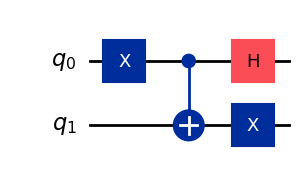

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from functions import ket_expression

qc = QuantumCircuit(2)

qc.x(0)

qc.cx(0, 1)

qc.h(0)

qc.x(1)

state = Statevector.from_instruction(qc)

print("Notación de Ket (Visual):")
print(ket_expression(state, qubit_order='visual'))
print("\nNotación de Ket (Qiskit):")
print(ket_expression(state, qubit_order='qiskit'))

print("\nEstado de \u03C8:")
for i, amp in enumerate(state.data):
    binary = format(i, f'0{qc.num_qubits}b')[::-1]
    print(f"|{binary}>: {amp}")

qc.draw("mpl")

# Exercise 6.05: What is the state ψ?

Notación de Ket (Visual):
-0.9999999999999998: .3f|1

Notación de Ket (Qiskit):
-0.9999999999999998: .3f|1

Estado de ψ:
|0>: 0j
|1>: (-0.9999999999999998+0j)


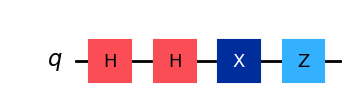

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from functions import ket_expression

qc = QuantumCircuit(1)

qc.h(0)

qc.h(0)

qc.x(0)

qc.z(0)

state = Statevector.from_instruction(qc)

print("Notación de Ket (Visual):")
print(ket_expression(state, qubit_order='visual'))
print("\nNotación de Ket (Qiskit):")
print(ket_expression(state, qubit_order='qiskit'))

print("\nEstado de \u03C8:")
for i, amp in enumerate(state.data):
    binary = format(i, f'0{qc.num_qubits}b')[::-1]
    print(f"|{binary}>: {amp}")

qc.draw("mpl")

# Exercise 6.02: What is the state ψ?

Notación de Ket (Visual):
0.7071067811865475: .3f|00 + 0.7071067811865475: .3f|11

Notación de Ket (Qiskit):
0.7071067811865475: .3f|00 + 0.7071067811865475: .3f|11

Estado de ψ:
|00>: (0.7071067811865475+0j)
|10>: 0j
|01>: 0j
|11>: (0.7071067811865475+0j)


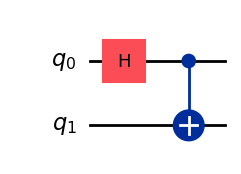

In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from functions import ket_expression

qc = QuantumCircuit(2)

qc.h(0)

qc.cx(0, 1)

state = Statevector.from_instruction(qc)

print("Notación de Ket (Visual):")
print(ket_expression(state, qubit_order='visual'))
print("\nNotación de Ket (Qiskit):")
print(ket_expression(state, qubit_order='qiskit'))

print("\nEstado de \u03C8:")
for i, amp in enumerate(state.data):
    binary = format(i, f'0{qc.num_qubits}b')[::-1]
    print(f"|{binary}>: {amp}")

qc.draw("mpl")

# Exercise 6.08: What is the state ψ?

Notación de Ket (Visual):
0.7071067811865474: .3f|0 + -0.7071067811865474: .3f|1

Notación de Ket (Qiskit):
0.7071067811865474: .3f|0 + -0.7071067811865474: .3f|1

Estado de ψ:
|0>: (0.7071067811865474+0j)
|1>: (-0.7071067811865474+0j)


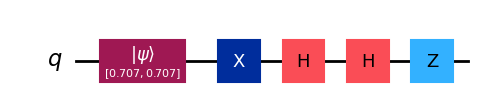

In [9]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from functions import ket_expression
import math

initial_state = [1/math.sqrt(2), 1/math.sqrt(2)]

qc = QuantumCircuit(1)

qc.initialize(initial_state, 0)

qc.x(0)

qc.h(0)

qc.h(0)

qc.z(0)

state = Statevector.from_instruction(qc)

print("Notación de Ket (Visual):")
print(ket_expression(state, qubit_order='visual'))
print("\nNotación de Ket (Qiskit):")
print(ket_expression(state, qubit_order='qiskit'))

print("\nEstado de \u03C8:")
for i, amp in enumerate(state.data):
    binary = format(i, f'0{qc.num_qubits}b')[::-1]
    print(f"|{binary}>: {amp}")

qc.draw("mpl")